In [1]:
%matplotlib inline

# Filter warnings
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import csv
import pandas as pd

plt.rcParams.update({'font.size': 15})

# Import custom classes
%run -i '../src/transfxns.py'
%run -i '../src/unsup_ml.py'

In [2]:
# Instantiate the classes
transfxn = TransformationPipeline()
model = UnsupervisedModels()
scaler = StandardScaler()

In [14]:
df = pd.read_csv('eps_all.csv')
ip_list = df['ip'].unique()
#print(ip_list)

# Sort the DataFrame by timestamp if it's not already sorted
df = df.sort_values(by='ip')
#print(df)

for ip in ip_list:
    print(ip)
    temp_df = df[df['ip']==ip]
    #print(temp_df)
    print(len(temp_df))
# Calculate Message Count, 10 Hours Moving Average, 20 Hours Moving Average, and 10 Days Standard Deviation
# df['MA_10'] = df['count'].rolling(window=10).mean()
# df['MA_20'] = df['count'].rolling(window=20).mean()
# df['STD'] = df['count'].rolling(window=10).std()

# df['count'] = min_value+(max_value-min_value)*(df['count']-min_count)/(max_count-min_count)
# df['MA_10'] = min_value+(max_value-min_value)*(df['MA_10']-min_count)/(max_count-min_count)
# df['MA_20'] = min_value+(max_value-min_value)*(df['MA_20']-min_count)/(max_count-min_count)

# std_max = df['STD'].max()
# std_min = df['STD'].min()

# df['STD'] = min_value+(max_value-min_value)*(df['STD']-std_min)/(std_max-std_min)


# Print the resulting DataFrame
#print(df)
# df = df[['count','MA_10','MA_20','STD']].dropna()

# data = df[['count','MA_10','MA_20','STD']].to_numpy()
#print(data)

# Transform and scale data
#X_scaled, _, feat_nm = transfxn.preprocessing(df, df)

192.168.44.128
4209
192.168.44.9
5533
192.168.61.1
8467
192.168.61.100
3891
192.168.61.119
8468
192.168.61.126
4790
192.168.61.127
4790
192.168.61.132
8468
192.168.61.134
8468
192.168.61.2
8466
192.168.61.200
1938
192.168.61.6
8467
192.168.61.8
8159
192.168.61.9
8157
192.168.66.5
469
192.168.61.109
110
192.168.144.4
242
192.168.144.5
240
192.168.61.4
438
192.168.61.5
438
192.168.61.69
55
192.168.66.4
516
192.168.44.100
39
unknown_host
25
192.168.66.119
185
192.168.66.17
25
192.168.66.16
41
0.0.0.0
20
192.168.44.125
200
192.168.44.4
217
192.168.44.5
216
192.168.44.8
4373
192.168.61.112
412
192.168.44.6
243
192.168.44.25
56
192.168.61.128
702
192.168.61.7
4302
127.0.0.1
4154
192.168.61.129
1
192.168.66.20
6
192.168.44.81
218
192.168.66.201
2


In [26]:
X_scaled.shape

(8448, 4)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

8448


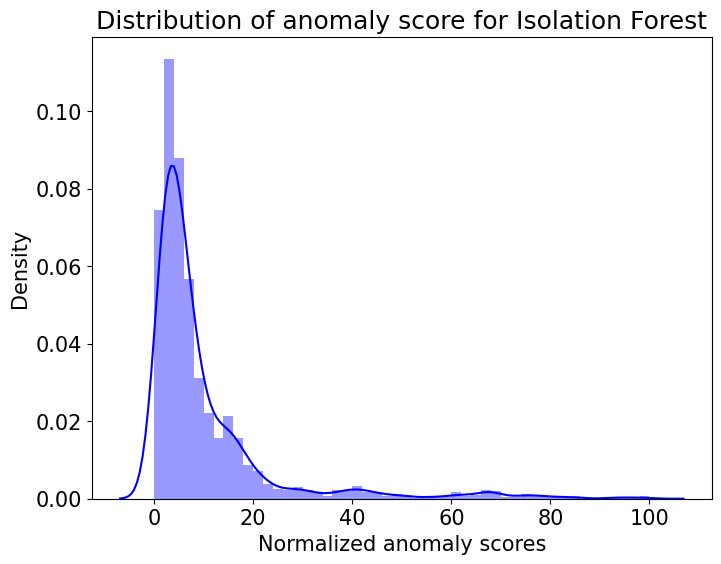

         count     MA_10     MA_20       STD  anomaly_score
19    0.200084  0.200126  0.200112  0.200088       1.337894
20    0.200071  0.200116  0.200111  0.200087       1.525152
21    0.200072  0.200108  0.200111  0.200087       1.476802
22    0.200062  0.200101  0.200107  0.200090       2.565886
23    0.200049  0.200089  0.200106  0.200078       2.911543
...        ...       ...       ...       ...            ...
8462  0.200231  0.200171  0.200226  0.200090       3.552756
8463  0.200235  0.200177  0.200225  0.200101       4.702623
8464  0.200174  0.200181  0.200181  0.200096       3.000770
8465  0.200177  0.200182  0.200179  0.200095       2.970152
8466  0.200211  0.200190  0.200180  0.200089       3.879186

[8448 rows x 5 columns]


In [28]:
# Train model
if_scores, if_y_pred = model.iforest(X_scaled, n_estimators = 100, random_state= 42)
print(len(if_y_pred))
# Add anomaly score to the data
if_df = df.copy()
if_df['anomaly_score'] = if_scores

# Plot anomaly score distribution
model.plot_dist(if_df.anomaly_score, color = 'b', 
                title = 'Distribution of anomaly score for Isolation Forest')

print(if_df)

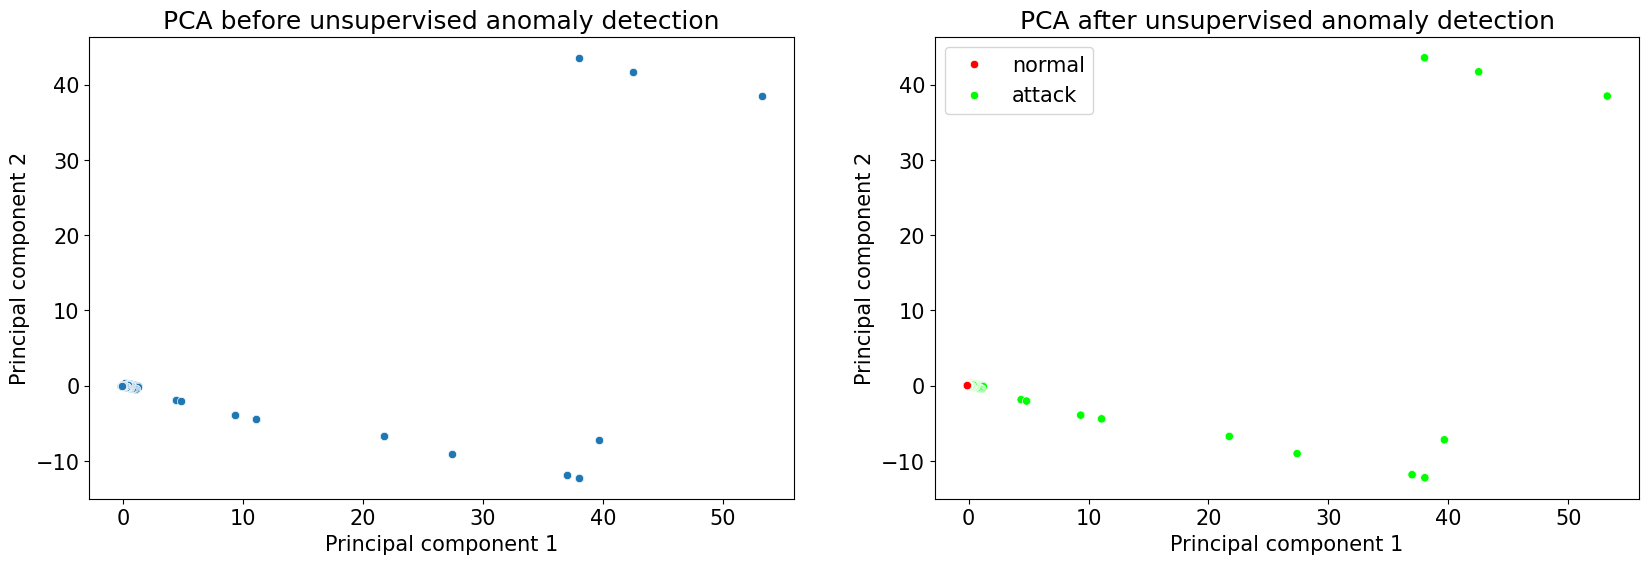

In [21]:
# PCA plot with raw predicted labels
if_y_pred = pd.Series(if_y_pred).map({0:'normal',1: 'attack'})
transfxn.pca_plot(scaler.fit_transform(df), if_y_pred, palette = ['r', 'lime'])

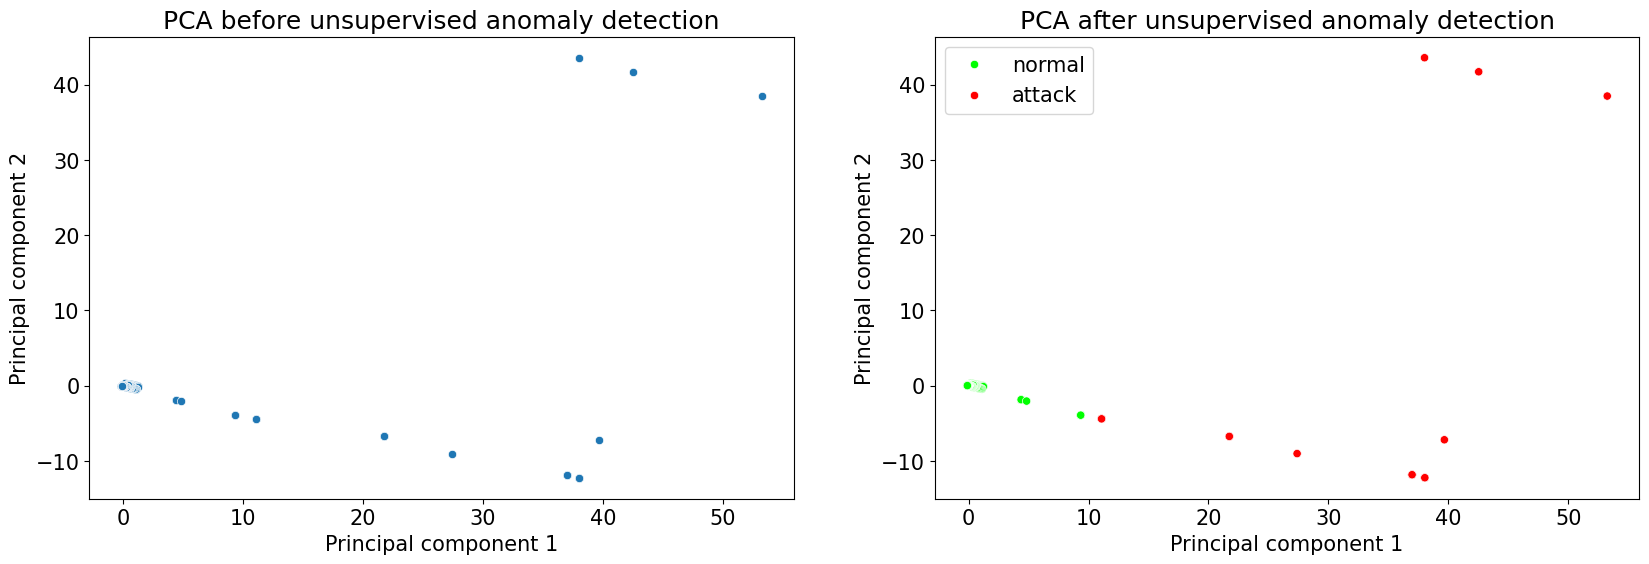

In [32]:
# Evaluation metric with threshold predicted labels
if_th_pred = np.where(if_scores >= 90, 1, 0)
#model.eval_metric(y_true, if_th_pred, model_nm = 'Isolation Forest with threshold >= 90')

# PCA plot with raw predicted labels
if_th_pred = pd.Series(if_th_pred).map({0:'normal',1: 'attack'})
transfxn.pca_plot(scaler.fit_transform(df), if_th_pred, palette = ['lime', 'r'])

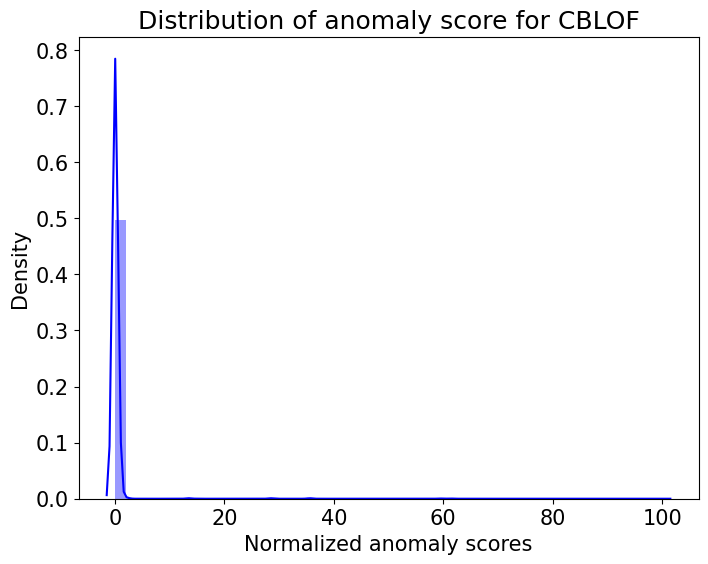

In [31]:
# Train model
cblof_scores, cblof_y_pred = model.cblof(X_scaled, contamination = 0.1, random_state = 42)

# Add anomaly score to the data
cblof_df = df.copy()
cblof_df['anomaly_score'] = cblof_scores

# Plot anomaly score distribution
model.plot_dist(cblof_df.anomaly_score, color = 'b',
                title = 'Distribution of anomaly score for CBLOF')

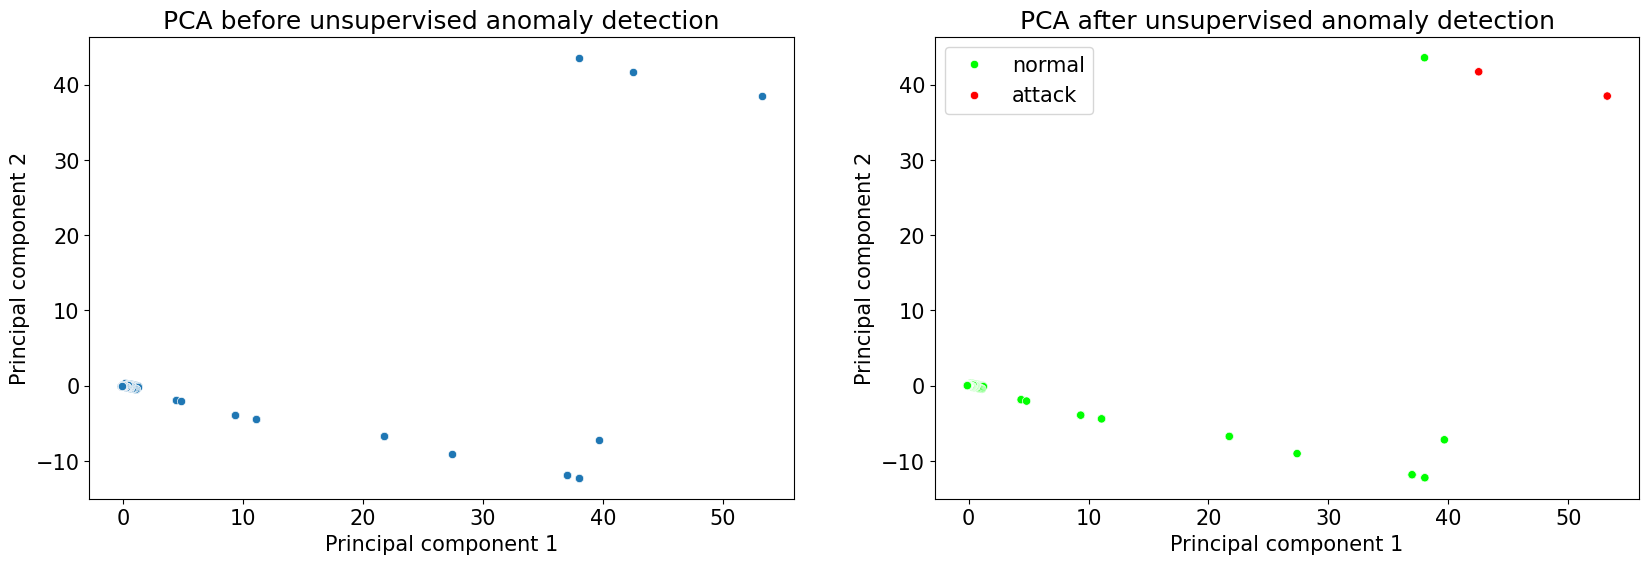

In [33]:
# Evaluation metric with threshold predicted labels
cblof_th_pred = np.where(cblof_scores >= 90, 1, 0)
#model.eval_metric(y_true, if_th_pred, model_nm = 'Isolation Forest with threshold >= 90')

# PCA plot with raw predicted labels
cblof_th_pred = pd.Series(cblof_th_pred).map({0:'normal',1: 'attack'})
transfxn.pca_plot(scaler.fit_transform(df), cblof_th_pred, palette = ['lime', 'r'])